# Tasks

#### 2: Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

#### 3: Clean your data so that it’s ready for analysis.

#### 4: Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

#### 5: State your hypothesis in a markdown cell within your Jupyter notebook.

#### 6: Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

#### 7: Split the data into two sets: a training set and a test set.

#### 8: Run a linear regression on the data.

- First, fit the model you created to the training set.
- Then, create a prediction for y on the test set.

#### 9: Create a plot that shows the regression line on the test set.

#### 10: Write your own interpretation of how well the line appears to fit the data in a markdown cell.

#### 11: Check the model performance statistics—MSE and R2 score.

#### 12: Compare the predicted y values with the actual y values in a dataframe.

#### 13: Include your thoughts on how well the model performed on the test set in a markdown cell.

- Include any reflections you have on the impact of possible data bias.


# Import Libraries

#### 2: Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import Data

In [2]:
path = r'C:\Users\maxca\Part 6 Gun Violence'

In [3]:
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_gunviolence_cleand_2.csv'))

# Cleaning Data

#### 3: Clean your data so that it’s ready for analysis.

In [4]:
df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,n_guns_involved,year,state_year,lawtotal,Total population
0,0,95289,2014-01-01,Michigan,Muskegon,0,0,Shots Fired - No Injuries,43.2301,NaN,-86.2514,1.372442,2014-01-01,Michigan2014,20,9747730
1,1,92607,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.4142,NaN,-82.9582,1.372442,2014-01-01,Michigan2014,20,9747730
2,2,92602,2014-01-01,Michigan,Detroit,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",42.3484,NaN,-83.0597,1.372442,2014-01-01,Michigan2014,20,9747730
3,3,92620,2014-01-01,Michigan,Detroit,0,2,Shot - Wounded/Injured||Brandishing/flourishin...,42.3756,NaN,-83.0643,1.372442,2014-01-01,Michigan2014,20,9747730
4,4,92612,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.3727,NaN,-83.1921,1.372442,2014-01-01,Michigan2014,20,9747730


In [5]:
df = df.drop(columns =['Unnamed: 0'])

# Isolating Year

In [6]:
# convert the date column into a datetime object
df['date'] = pd.to_datetime(df['date'])

# extract the day, month, and year components
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# show the modified data frame
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,n_guns_involved,year,state_year,lawtotal,Total population,day,month
0,95289,2014-01-01,Michigan,Muskegon,0,0,Shots Fired - No Injuries,43.2301,NaN,-86.2514,1.372442,2014,Michigan2014,20,9747730,1,1
1,92607,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.4142,NaN,-82.9582,1.372442,2014,Michigan2014,20,9747730,1,1
2,92602,2014-01-01,Michigan,Detroit,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",42.3484,NaN,-83.0597,1.372442,2014,Michigan2014,20,9747730,1,1
3,92620,2014-01-01,Michigan,Detroit,0,2,Shot - Wounded/Injured||Brandishing/flourishin...,42.3756,NaN,-83.0643,1.372442,2014,Michigan2014,20,9747730,1,1
4,92612,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.3727,NaN,-83.1921,1.372442,2014,Michigan2014,20,9747730,1,1


# Dropping day and month

In [7]:
df = df.drop(columns =['day', 'month'])

In [8]:
df.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,incident_characteristics,latitude,location_description,longitude,n_guns_involved,year,state_year,lawtotal,Total population
0,95289,2014-01-01,Michigan,Muskegon,0,0,Shots Fired - No Injuries,43.2301,NaN,-86.2514,1.372442,2014,Michigan2014,20,9747730
1,92607,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.4142,NaN,-82.9582,1.372442,2014,Michigan2014,20,9747730
2,92602,2014-01-01,Michigan,Detroit,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",42.3484,NaN,-83.0597,1.372442,2014,Michigan2014,20,9747730
3,92620,2014-01-01,Michigan,Detroit,0,2,Shot - Wounded/Injured||Brandishing/flourishin...,42.3756,NaN,-83.0643,1.372442,2014,Michigan2014,20,9747730
4,92612,2014-01-01,Michigan,Detroit,0,1,Shot - Wounded/Injured,42.3727,NaN,-83.1921,1.372442,2014,Michigan2014,20,9747730


# Aggregating everyting in its years and state # incident_id will be incident count

In [9]:
df_agg = df.groupby('state_year').aggregate({'incident_id' : 'count', 'n_killed': 'sum',
                             'n_injured': 'sum', 'n_guns_involved' : 'sum', 'lawtotal': 'first', 'Total population' : 'first'})

In [10]:
df_agg.head()

,incident_id,n_killed,n_injured,n_guns_involved,lawtotal,Total population
state_year,,,,,,
Alabama2014,1318,325,591,1792.073225,10,4505293
Alabama2015,1034,385,562,1484.432117,10,4387292
Alabama2016,1309,488,761,1839.658694,10,4540957
Alabama2017,1461,544,856,1882.117325,10,4592069
Alabama2018,347,135,219,393.000000,10,4533634


In [11]:
# Calculate incidents per 100000 population
df_agg['incidents_per_100000'] = (df_agg['incident_id'] / df_agg['Total population']) * 100000

In [12]:
# Calculate n_killed per 100000 population
df_agg['n_killed_per_100000'] = (df_agg['n_killed'] / df_agg['Total population']) * 100000

In [13]:
# Calculate injured per 100000 population
df_agg['n_injured_per_100000'] = (df_agg['n_injured'] / df_agg['Total population']) * 100000

In [14]:
# Calculate n_guns_involved per 100000 population
df_agg['n_guns_involved_per_100000'] = (df_agg['n_guns_involved'] / df_agg['Total population']) * 100000

In [15]:
df_agg.head()

,incident_id,n_killed,n_injured,n_guns_involved,lawtotal,Total population,incidents_per_100000,n_killed_per_100000,n_injured_per_100000,n_guns_involved_per_100000
state_year,,,,,,,,,,
Alabama2014,1318,325,591,1792.073225,10,4505293,29.254479,7.213737,13.117904,39.777063
Alabama2015,1034,385,562,1484.432117,10,4387292,23.568069,8.775345,12.809724,33.834815
Alabama2016,1309,488,761,1839.658694,10,4540957,28.826523,10.746633,16.758582,40.512577
Alabama2017,1461,544,856,1882.117325,10,4592069,31.815724,11.846512,18.640835,40.986260
Alabama2018,347,135,219,393.000000,10,4533634,7.653904,2.977744,4.830562,8.668543


# Dropping the individual incident, killed, injured, guns involved and total population columns

In [18]:
df_agg = df_agg.drop(columns =['incident_id', 'n_killed', 'n_injured', 'n_guns_involved', 'Total population'])

In [20]:
df_agg.index = df_agg.index.astype(str)  # Convert index to string type

# Extract state and year from 'state_year' column
df_agg['State'] = df_agg.index.str[:-4]
df_agg['Year'] = df_agg.index.str[-4:]

In [21]:
df_agg.head()

,lawtotal,incidents_per_100000,n_killed_per_100000,n_injured_per_100000,n_guns_involved_per_100000,State,Year
state_year,,,,,,,
Alabama2014,10,29.254479,7.213737,13.117904,39.777063,Alabama,2014
Alabama2015,10,23.568069,8.775345,12.809724,33.834815,Alabama,2015
Alabama2016,10,28.826523,10.746633,16.758582,40.512577,Alabama,2016
Alabama2017,10,31.815724,11.846512,18.640835,40.986260,Alabama,2017
Alabama2018,10,7.653904,2.977744,4.830562,8.668543,Alabama,2018


# Cleaning data

In [22]:
# Check for missing values

df_agg.isnull().sum()

lawtotal                      0
incidents_per_100000          0
n_killed_per_100000           0
n_injured_per_100000          0
n_guns_involved_per_100000    0
State                         0
Year                          0
dtype: int64

In [23]:
# Last check for NaN

df_agg.isnull().sum()

lawtotal                      0
incidents_per_100000          0
n_killed_per_100000           0
n_injured_per_100000          0
n_guns_involved_per_100000    0
State                         0
Year                          0
dtype: int64

In [24]:
dups = df_agg.duplicated()

In [25]:
dups.shape # no dups

(250,)

# Exporting new data set

In [30]:
df_agg.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_gunv_agg_linreg.csv'))

# Looking at the data we want to use

#### 4: Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test

D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


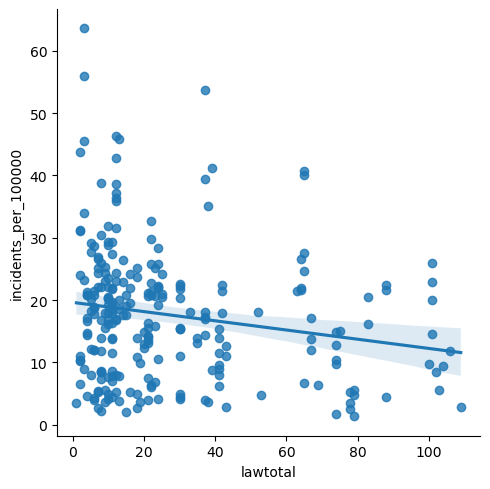

In [26]:
# Create a scatterplot for the "lawtotal" and "incidents_per_1000" columns in seaborn

sns.lmplot(x = 'lawtotal', y = 'incidents_per_100000', data = df_agg)

D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


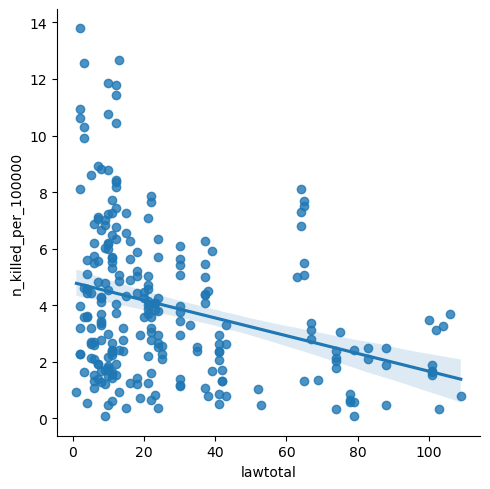

In [27]:
# Create a scatterplot for the "lawtotal" and 'n_killed_per_100000' columns in seaborn

sns.lmplot(x = 'lawtotal', y = 'n_killed_per_100000', data = df_agg)

D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


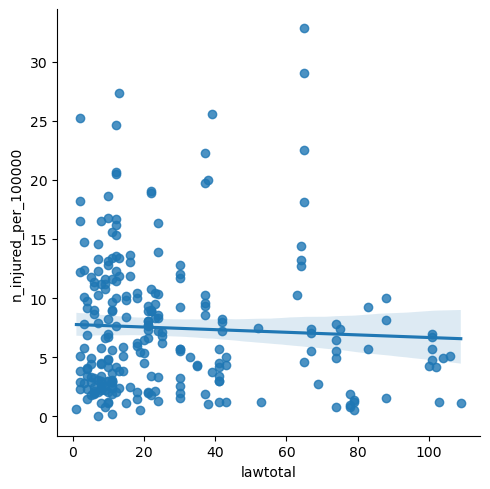

In [28]:
# Create a scatterplot for the "lawtotal" and 'n_injured_per_100000' columns in seaborn

sns.lmplot(x = 'lawtotal', y = 'n_injured_per_100000', data = df_agg)

D:\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


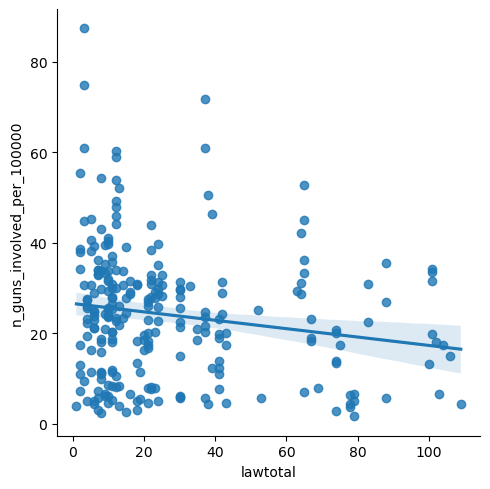

In [29]:
# Create a scatterplot for the "lawtotal" and 'n_guns_involved_per_100000 columns in seaborn

sns.lmplot(x = 'lawtotal', y = 'n_guns_involved_per_100000', data = df_agg)

# Hypothesis

#### 5: State your hypothesis in a markdown cell within your Jupyter notebook.


#### 
1. The more gun laws exist in a state the less people will be injured trough gun related violence.
2. The more gun laws exist in a state the less people will be killend trough gun related violence.
3. The more gun laws exist in a state the less gun related incidents occure.
4. The more gun laws exist in a state the less guns are involved in gun related incidents.

# 6: Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

#### Starting with lawtotal (X1) and 'incidents_per_100000' (y1)

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = df_agg['lawtotal'].values.reshape(-1,1)
y1 = df_agg['incidents_per_100000'].values.reshape(-1,1)

In [33]:
X1

array([[ 10],
       [ 10],
       [ 10],
       [ 10],
       [ 10],
       [  3],
       [  3],
       [  3],
       [  3],
       [  3],
       [  8],
       [  8],
       [  8],
       [  8],
       [  8],
       [ 11],
       [ 11],
       [ 11],
       [ 11],
       [ 11],
       [100],
       [102],
       [104],
       [106],
       [109],
       [ 30],
       [ 30],
       [ 30],
       [ 30],
       [ 30],
       [ 83],
       [ 83],
       [ 88],
       [ 88],
       [ 88],
       [ 37],
       [ 37],
       [ 38],
       [ 39],
       [ 41],
       [ 21],
       [ 21],
       [ 21],
       [ 21],
       [ 30],
       [  6],
       [  6],
       [  6],
       [  6],
       [  6],
       [ 78],
       [ 78],
       [ 79],
       [ 79],
       [ 79],
       [  5],
       [  6],
       [  2],
       [  2],
       [  1],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 65],
       [ 11],
       [ 11],
       [ 12],
       [ 12],
       [ 12],
       [ 25],
      

In [34]:
y1

array([[29.25447912],
       [23.56806887],
       [28.82652269],
       [31.81572402],
       [ 7.65390413],
       [23.28481798],
       [55.96061551],
       [63.58705282],
       [45.53923773],
       [ 8.99238154],
       [ 8.52351816],
       [ 7.35888081],
       [ 8.511959  ],
       [ 8.70609743],
       [ 2.22780292],
       [21.98482202],
       [19.65212093],
       [27.46302314],
       [29.27329405],
       [ 7.0725031 ],
       [ 9.81445757],
       [ 8.42317511],
       [ 9.38182879],
       [11.91092549],
       [ 2.86815542],
       [11.03554059],
       [15.33888323],
       [15.5474929 ],
       [15.34434978],
       [ 4.50735918],
       [16.23027277],
       [20.51083958],
       [22.37660126],
       [21.69995198],
       [ 4.48420876],
       [53.75875079],
       [39.50546924],
       [35.09166092],
       [41.21932922],
       [11.44613245],
       [16.39638667],
       [14.02541798],
       [21.15265718],
       [20.600712  ],
       [ 4.2149206 ],
       [21

#### n_killed_per_100000 (y2)

In [42]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = df_agg['lawtotal'].values.reshape(-1,1)
y2= df_agg['n_killed_per_100000'].values.reshape(-1,1)

#### n_injured_per_100000 (y3)

In [43]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X3 = df_agg['lawtotal'].values.reshape(-1,1)
y3= df_agg['n_injured_per_100000'].values.reshape(-1,1)

#### 'n_guns_involved_per_100000' (y4)

In [44]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X4 = df_agg['lawtotal'].values.reshape(-1,1)
y4= df_agg['n_guns_involved_per_100000'].values.reshape(-1,1)

#### 7: Split the data into two sets: a training set and a test set.

#### incidents (y1)

In [45]:
# Split data into a training set and a test set. incidents

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

#### n_killed (y2)

In [46]:
# Split data into a training set and a test set. killed

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

#### n_injured (y3)

In [47]:
# Split data into a training set and a test set. injured

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

#### n_guns (y4)

In [48]:
# Split data into a training set and a test set. n guns

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=0)

# Regression incidents

#### 8: Run a linear regression on the data.

- First, fit the model you created to the training set.
- Then, create a prediction for y on the test set.

In [52]:
# Create a regression object. incidents

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

#### incidents (y1)

In [53]:
# Fit the regression object onto the training set.

regression.fit(X1_train, y1_train)

LinearRegression()

In [54]:
# Predict the values of y using X.

y1_predicted = regression.predict(X1_test)

#### n_killed (y2)

In [60]:
# Fit the regression object onto the training set.

regression.fit(X2_train, y2_train)

LinearRegression()

In [61]:
# Predict the values of y using X.

y2_predicted = regression.predict(X2_test)

#### n_injured (y3)

In [67]:
# Fit the regression object onto the training set.

regression.fit(X3_train, y3_train)

LinearRegression()

In [68]:
# Predict the values of y using X.

y3_predicted = regression.predict(X3_test)

#### n_guns_involved (y4)

In [76]:
# Fit the regression object onto the training set.

regression.fit(X4_train, y4_train)

LinearRegression()

In [77]:
# Predict the values of y using X.

y4_predicted = regression.predict(X4_test)

#### 9: Create a plot that shows the regression line on the test set.

#### Incidents (y1)

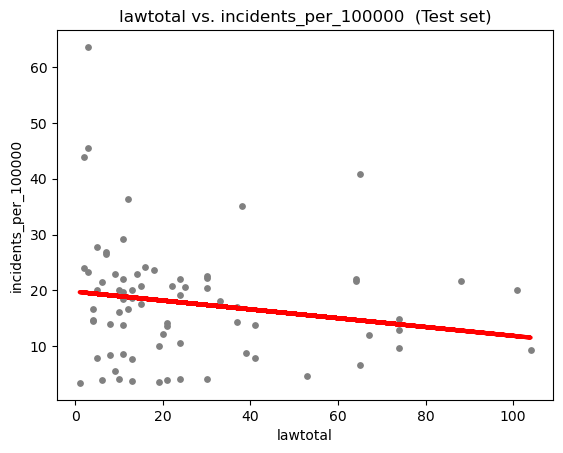

In [55]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X1_test, y1_test, color='gray', s = 15)
plot_test.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test.title('lawtotal vs. incidents_per_100000  (Test set)')
plot_test.xlabel('lawtotal')
plot_test.ylabel('incidents_per_100000')
plot_test.show()

#### n_killed (y2)

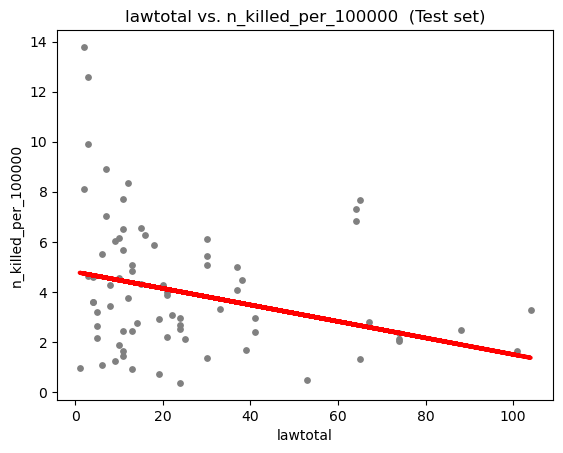

In [62]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('lawtotal vs. n_killed_per_100000  (Test set)')
plot_test.xlabel('lawtotal')
plot_test.ylabel('n_killed_per_100000')
plot_test.show()

#### n_injured (y3)

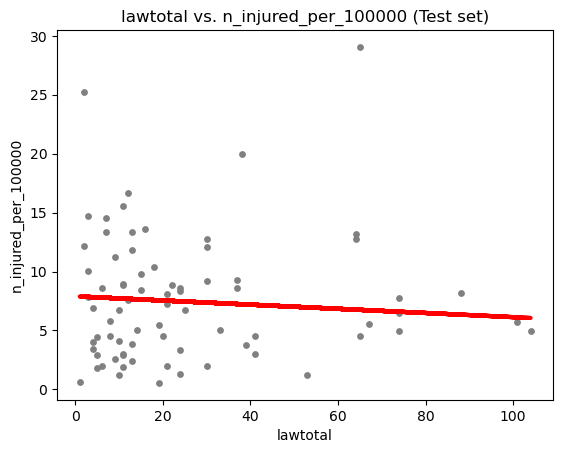

In [70]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X3_test, y3_test, color='gray', s = 15)
plot_test.plot(X3_test, y3_predicted, color='red', linewidth =3)
plot_test.title('lawtotal vs. n_injured_per_100000 (Test set)')
plot_test.xlabel('lawtotal')
plot_test.ylabel('n_injured_per_100000')
plot_test.show()

#### n_guns (y4)

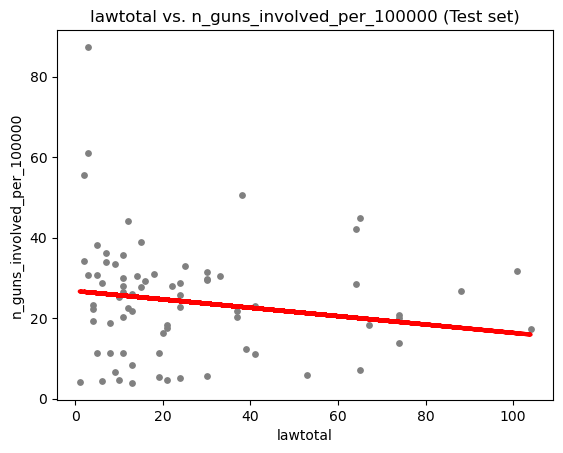

In [79]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X4_test, y4_test, color='gray', s = 15)
plot_test.plot(X4_test, y4_predicted, color='red', linewidth =3)
plot_test.title('lawtotal vs. n_guns_involved_per_100000 (Test set)')
plot_test.xlabel('lawtotal')
plot_test.ylabel('n_guns_involved_per_100000')
plot_test.show()

#### 10: Write your own interpretation of how well the line appears to fit the data in a markdown cell.

#### The points are really far from the regression line in all 4 cases.

#### 11: Check the model performance statistics—MSE and R2 score.

#### incidents (y1)

In [56]:
# Create objects that contain the model summary statistics.

rmse1 = mean_squared_error(y1_test, y1_predicted) # This is the mean squared error
r2_1 = r2_score(y1_test, y1_predicted) # This is the R2 score. 

In [57]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse1)
print('R2 score: ', r2_1)

Slope: [[-0.07892797]]
Mean squared error:  111.36024325901263
R2 score:  0.01610004621495298


In [58]:
y1_predicted

array([[18.80671871],
       [19.20135855],
       [18.88564668],
       [13.91318472],
       [18.96457465],
       [17.38601529],
       [18.80671871],
       [19.20135855],
       [14.62353643],
       [13.91318472],
       [18.72779074],
       [16.51780765],
       [18.096367  ],
       [16.83351952],
       [19.59599839],
       [17.8595831 ],
       [19.35921449],
       [18.096367  ],
       [18.96457465],
       [14.70246439],
       [13.91318472],
       [19.28028652],
       [18.33315091],
       [16.51780765],
       [18.96457465],
       [18.88564668],
       [19.51707042],
       [19.35921449],
       [15.57067204],
       [16.75459155],
       [19.28028652],
       [19.43814245],
       [16.67566358],
       [18.49100684],
       [18.64886278],
       [18.56993481],
       [18.01743904],
       [19.51707042],
       [11.54534569],
       [19.43814245],
       [19.59599839],
       [19.12243058],
       [18.096367  ],
       [19.04350262],
       [18.25422294],
       [14

#### n_killed (y2)

In [63]:
# Create objects that contain the model summary statistics.

rmse2 = mean_squared_error(y2_test, y2_predicted) # This is the mean squared error
r2_2 = r2_score(y2_test, y2_predicted) # This is the R2 score. 

In [64]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r2_2)

Slope: [[-0.03297287]]
Mean squared error:  6.636224557887091
R2 score:  0.0507558104732726


In [65]:
y2_predicted

array([[4.40117692],
       [4.56604125],
       [4.43414979],
       [2.35685927],
       [4.46712265],
       [3.80766535],
       [4.40117692],
       [4.56604125],
       [2.65361506],
       [2.35685927],
       [4.36820406],
       [3.44496383],
       [4.10442114],
       [3.57685529],
       [4.73090558],
       [4.00550254],
       [4.63198698],
       [4.10442114],
       [4.46712265],
       [2.68658793],
       [2.35685927],
       [4.59901411],
       [4.20333973],
       [3.44496383],
       [4.46712265],
       [4.43414979],
       [4.69793271],
       [4.63198698],
       [3.04928945],
       [3.54388243],
       [4.59901411],
       [4.66495985],
       [3.51090956],
       [4.26928546],
       [4.33523119],
       [4.30225833],
       [4.07144827],
       [4.69793271],
       [1.36767332],
       [4.66495985],
       [4.73090558],
       [4.53306838],
       [4.10442114],
       [4.50009552],
       [4.17036687],
       [2.68658793],
       [3.80766535],
       [3.807

#### n_injured (y3)

In [71]:
# Create objects that contain the model summary statistics.

rmse3 = mean_squared_error(y3_test, y3_predicted) # This is the mean squared error
r2_3 = r2_score(y3_test, y3_predicted) # This is the R2 score. 

In [72]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse3)
print('R2 score: ', r2_3)

Slope: [[-0.01766688]]
Mean squared error:  29.29943113067763
R2 score:  -0.013953875099115942


In [73]:
y3_predicted

array([[7.6830475 ],
       [7.77138191],
       [7.70071438],
       [6.58770085],
       [7.71838126],
       [7.36504363],
       [7.6830475 ],
       [7.77138191],
       [6.74670279],
       [6.58770085],
       [7.66538062],
       [7.17070794],
       [7.52404557],
       [7.24137546],
       [7.85971631],
       [7.47104492],
       [7.80671567],
       [7.52404557],
       [7.71838126],
       [6.76436967],
       [6.58770085],
       [7.78904879],
       [7.57704621],
       [7.17070794],
       [7.71838126],
       [7.70071438],
       [7.84204943],
       [7.80671567],
       [6.95870536],
       [7.22370858],
       [7.78904879],
       [7.82438255],
       [7.2060417 ],
       [7.61237997],
       [7.64771374],
       [7.63004686],
       [7.50637869],
       [7.84204943],
       [6.05769441],
       [7.82438255],
       [7.85971631],
       [7.75371503],
       [7.52404557],
       [7.73604814],
       [7.55937933],
       [6.76436967],
       [7.36504363],
       [7.365

#### n_guns (y4)

In [80]:
# Create objects that contain the model summary statistics.

rmse4 = mean_squared_error(y4_test, y4_predicted) # This is the mean squared error
r2_4 = r2_score(y4_test, y4_predicted) # This is the R2 score. 

In [81]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse4)
print('R2 score: ', r2_4)

Slope: [[-0.10400514]]
Mean squared error:  205.21778204079476
R2 score:  0.002679825396769475


In [82]:
y4_predicted

array([[25.50329522],
       [26.02332094],
       [25.60730036],
       [19.05497624],
       [25.71130551],
       [23.63120261],
       [25.50329522],
       [26.02332094],
       [19.99102254],
       [19.05497624],
       [25.39929007],
       [22.48714602],
       [24.56724891],
       [22.9031666 ],
       [26.54334667],
       [24.25523348],
       [26.23133123],
       [24.56724891],
       [25.71130551],
       [20.09502769],
       [19.05497624],
       [26.12732609],
       [24.87926435],
       [22.48714602],
       [25.71130551],
       [25.60730036],
       [26.43934152],
       [26.23133123],
       [21.23908428],
       [22.79916145],
       [26.12732609],
       [26.33533638],
       [22.69515631],
       [25.08727464],
       [25.29528493],
       [25.19127978],
       [24.46324377],
       [26.43934152],
       [15.93482189],
       [26.33533638],
       [26.54334667],
       [25.9193158 ],
       [24.56724891],
       [25.81531065],
       [24.7752592 ],
       [20

#### 12: Compare the predicted y values with the actual y values in a dataframe.

#### incidents (y1)

In [59]:
# Create a dataframe comparing the actual and predicted values of y.

data_incidents = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data_incidents.head(30)

,Actual,Predicted
0,16.747235,18.806719
1,26.869918,19.201359
2,18.370941,18.885647
3,12.834716,13.913185
4,4.074963,18.964575
5,20.400871,17.386015
6,36.345735,18.806719
7,26.530528,19.201359
8,40.750723,14.623536
9,9.757987,13.913185


#### n_killed (y2)

In [66]:
# Create a dataframe comparing the actual and predicted values of y.

data_killed = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data_killed.head(30)

,Actual,Predicted
0,3.736225,4.401177
1,8.916242,4.566041
2,1.425332,4.434150
3,2.117067,2.356859
4,1.861403,4.467123
5,5.418981,3.807665
6,8.341990,4.401177
7,7.031878,4.566041
8,7.679297,2.653615
9,2.035691,2.356859


#### n_injured (y3)

In [74]:
# Create a dataframe comparing the actual and predicted values of y.

data_injured = pd.DataFrame({'Actual': y3_test.flatten(), 'Predicted': y3_predicted.flatten()})
data_injured.head(30)

,Actual,Predicted
0,7.604007,7.683048
1,14.577623,7.771382
2,2.929848,7.700714
3,6.488605,6.587701
4,1.207397,7.718381
5,12.047066,7.365044
6,16.705100,7.683048
7,13.342537,7.771382
8,29.059614,6.746703
9,4.948217,6.587701


#### n_guns (y4)

In [83]:
# Create a dataframe comparing the actual and predicted values of y.

data_guns = pd.DataFrame({'Actual': y4_test.flatten(), 'Predicted': y4_predicted.flatten()})
data_guns.head(30)

,Actual,Predicted
0,22.632628,25.503295
1,33.968590,26.023321
2,28.088451,25.607300
3,19.975836,19.054976
4,4.678661,25.711306
5,29.725881,23.631203
6,44.167617,25.503295
7,36.225052,26.023321
8,44.996635,19.991023
9,13.944995,19.054976


#### 13: Include your thoughts on how well the model performed on the test set in a markdown cell.

- Include any reflections you have on the impact of possible data bias.

#### In all for cases the model performes poorly. This may have to do with the low sample size since it is aggregated, or I need some kind of categories for the laws (higly restricting, low restricting etc.) - but for the sample size I would need at least 50 or more years and for the categories I would need a lot more knowledge about law. 

#### At this point I can assume my hypotheses are disproven, which in this case just means that just the number of laws (without looking at the laws itself) doesn't affect the amount of incidents, killed, injured and number of guns used.

#### I tested everyting without aggregating, even tho it doesn't make sense to do so and got similiar results.